
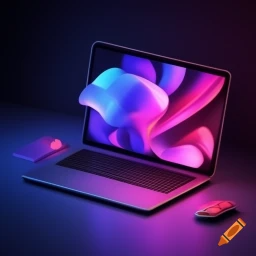

In [ ]:
#@title Project
import requests
from IPython.display import Image, display
from IPython.display import HTML

# Direct image URL
image_url = "https://drive.google.com/uc?export=view&id=14XYwatu7Y5jErwnFKuRH5SwGlV4fsU7c"


# Download the image
response = requests.get(image_url)
with open('image.jpg', 'wb') as file:
    file.write(response.content)

import base64

# Convert the image to a base64 string
with open("image.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# Create the HTML code with the base64 image
html_code = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portfolio Header</title>
    <!-- Include Font Awesome -->
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css">
    <style>
        body {{
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: flex-start; /* Align items to the top */
            /*align-items: center;*/
            padding: 20px;
            background-color: #f4f4f4;
            border-bottom: 2px solid #ccc;
        }}
        .header img {{
            border-radius: 50%;
            width: 100px;
            height: 100px;
            object-fit: cover;
            margin-right: 20px;
            box-shadow: 0 0 20px #86e3dd; /* Glowing effect */
            vertical-align: top;
        }}
        .header .text-container {{
            display: flex;
            flex-direction: column;
        }}
        .header h1 {{
            margin: 0;
            font-size: 2em;
        }}
        .header p {{
            margin: 5px 0 0 0;
            font-size: 1em;
            color: #666;
        }}
        .header .social-icons {{
            margin-top: 10px;
        }}
        .header .social-icons a {{
            margin-right: 10px;
            color: #666;
            text-decoration: none;
            font-size: 1.5em;
        }}
        .header .social-icons a:hover {{
            color: #000;
        }}
    </style>
</head>
<body>
    <header class="header">
        <img src="data:image/jpeg;base64,{encoded_string}" alt="Profile Picture">
        <div class="text-container">


            <h1>Laptop Price Predictor end-to-end Machine Learning Project</h1>
            <p>#soft_skills #machine learning #linear regression #numpy #pandas #sk learn #python #css #html #flask #heroku </p>
            &nbsp;
            <p>Don Jay</p>

            <div class="social-icons">




                <a href="https://www.linkedin.com/in/rajitha-jayawardena/" target="_blank"><i class="fab fa-linkedin"></i></a>
                <a href="https://www.datascienceportfol.io/EDR" target="_blank"><i class="fas fa-briefcase"></i></i></a>



            </div>
        </div>
    </header>
</body>
</html>
"""

# Display the HTML code in the Jupyter/Colab notebook
display(HTML(html_code))

### **Problem Statement:**

Developed a machine learning model to predict the price of laptops based on various features such as RAM, weight, company, type, *Operating* System, CPU, and GPU. Created a web interface to interact with the model and provide predictions based on user inputs.

### Load Data


In [ ]:
!gdown --id 16PwCmA9zrMu97sUx8f3NsK_WLjQXmPJ0

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16PwCmA9zrMu97sUx8f3NsK_WLjQXmPJ0
To: /content/laptop_price.csv
100% 178k/178k [00:00<00:00, 74.0MB/s]


### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/laptop_price.csv', encoding='latin1')

In [ ]:
df.head(4)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45


In [ ]:
df.shape

(1303, 12)

In [ ]:
df.isnull()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().count()

,0
laptop_ID,1303
Company,1303
Product,1303
TypeName,1303
Inches,1303
ScreenResolution,1303
Cpu,1303
Ram,1303
Gpu,1303
OpSys,1303


In [ ]:
df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Gpu,0
OpSys,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
# Convert 'Ram' column to integer by removing 'GB'
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [ ]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [ ]:
# Remove 'kg' from Weight and convert to float
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [ ]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94


In [ ]:
df['Company'].value_counts()

,count
Company,
Dell,297
Lenovo,297
HP,274
Asus,158
Acer,103
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [ ]:
# Define the function
def add_company(company_name, counts, threshold=10):
    if counts[company_name] < threshold:
        return 'Other'
    else:
        return company_name

# Apply the function to create a new column without explicitly defining company_counts
df['Company'] = df['Company'].apply(lambda x: add_company(x, df['Company'].value_counts()))



In [ ]:
df['Company'].value_counts()

,count
Company,
Dell,297
Lenovo,297
HP,274
Asus,158
Acer,103
MSI,54
Other,51
Toshiba,48
Apple,21


In [ ]:
df['Product'].value_counts()

,count
Product,
XPS 13,30
Inspiron 3567,29
250 G6,21
Legion Y520-15IKBN,19
Vostro 3568,19
...,...
15-bw007nv (A10-9620P/6GB/128GB/Radeon,1
SmartBook 130,1
A541NA-GO342 (N3350/4GB/500GB/Linux),1


In [ ]:
len(df['Product'].value_counts())

618

In [ ]:
(df['ScreenResolution'].value_counts())

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
len(df['ScreenResolution'].value_counts())

40

In [ ]:
# Create 'Touchscreen' column: 1 if 'Touchscreen' is in the 'ScreenResolution', else 0
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

# Create 'IPS' column: 1 if 'IPS' is in the 'ScreenResolution', else 0
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [ ]:
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,AMD Radeon R5,Windows 10,2.10,400.00,0,0
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,0,1
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,1158.70,0,0
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,Nvidia GeForce MX150,Windows 10,1.30,1495.00,0,0
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,Intel UHD Graphics 620,Windows 10,1.60,770.00,0,1


In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [ ]:
len(df['Cpu'].value_counts())

118

In [ ]:
# Create 'Cpu_name' column by extracting the first three words from the 'Cpu' column
df['Cpu_name'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[:3]))

In [ ]:
df.head(20)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Cpu_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,AMD Radeon R5,Windows 10,2.10,400.00,0,0,AMD A9-Series 9420
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,0,1,Intel Core i7
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,1158.70,0,0,Intel Core i5
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,Nvidia GeForce MX150,Windows 10,1.30,1495.00,0,0,Intel Core i7
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,Intel UHD Graphics 620,Windows 10,1.60,770.00,0,1,Intel Core i5


In [ ]:
# Define the function to categorize the CPU names
def categorize_cpu(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name =='Intel Core i3':
        return name
    elif name.split()[0] == 'AMD':
        return 'AMD'
    else:
        return 'Other'

# Apply the function to create the new 'Cpu_name' column
df['Cpu_name'] = df['Cpu_name'].apply(categorize_cpu)


In [ ]:
df['Cpu_name'].value_counts()

,count
Cpu_name,
Intel Core i7,527
Intel Core i5,423
Other,155
Intel Core i3,136
AMD,62


In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [ ]:
len(df['Gpu'].value_counts())

110

In [ ]:
# Create 'Gpu_name' column by extracting the first word from the 'Gpu' column
df['Gpu_name'] = df['Gpu'].apply(lambda x: ' '.join(x.split()[:1]))

In [ ]:
df['Gpu_name'].value_counts()

,count
Gpu_name,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [ ]:
# Remove rows where 'Gpu_name' is 'ARM'
df = df[df['Gpu_name'] != 'ARM']

In [ ]:
df['Gpu_name'].value_counts()

,count
Gpu_name,
Intel,722
Nvidia,400
AMD,180


In [ ]:
 df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [ ]:
# Define the function to categorize the operating systems
def categorize_op_sys(op_sys):
    if 'Windows' in op_sys:
        return 'Windows'
    elif 'macOS' in op_sys or 'Mac' in op_sys:
        return 'Mac'
    elif 'Linux' in op_sys:
        return 'Linux'
    else:
        return 'Other'

# Apply the function to create the new 'OpSys_category' column
df['OpSys'] = df['OpSys'].apply(categorize_op_sys)


In [ ]:
 df['OpSys'].value_counts()

,count
OpSys,
Windows,1125
Other,94
Linux,62
Mac,21


Dropping unnecessary columns after preprocessing: 'laptop_ID', 'Inches', 'ScreenResolution', 'Cpu', 'Gpu', and 'Product'. These columns are either redundant or have been transformed into more relevant features.



In [ ]:
# Drop the specified columns from the DataFrame
df = df.drop(columns=['laptop_ID', 'Inches', 'ScreenResolution', 'Cpu', 'Gpu', 'Product'])

In [ ]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,Cpu_name,Gpu_name
0,Apple,Ultrabook,8,Mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,Apple,Ultrabook,8,Mac,1.34,898.94,0,0,Intel Core i5,Intel


In [ ]:
df = pd.get_dummies(df).astype(int)

In [ ]:
df.head(2)

,Ram,Weight,Price_euros,Touchscreen,IPS,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_Other,OpSys_Windows,Cpu_name_AMD,Cpu_name_Intel Core i3,Cpu_name_Intel Core i5,Cpu_name_Intel Core i7,Cpu_name_Other,Gpu_name_AMD,Gpu_name_Intel,Gpu_name_Nvidia
0,8,1,1339,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,8,1,898,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df.shape

(1302, 32)

### Model Building

In [ ]:
# Define the target variable (y)
y = df['Price_euros']

# Define the features (X) by dropping the target column
X = df.drop(columns=['Price_euros'])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X_train.shape, X_test.shape

((976, 31), (326, 31))

In [ ]:
def model_acc(model):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Get accuracy on the test set
    acc = model.score(X_test, y_test)

    # Print model name and accuracy
    print(f"{model.__class__.__name__} ---> Accuracy: {acc:.4f}")


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

LinearRegression ---> Accuracy: 0.7338


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize models
lr = LinearRegression()
lasso = Lasso()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

# Evaluate models
model_acc(lr)
model_acc(lasso)
model_acc(dt)
model_acc(rf)

LinearRegression ---> Accuracy: 0.7338
Lasso ---> Accuracy: 0.7316
DecisionTreeRegressor ---> Accuracy: 0.6741
RandomForestRegressor ---> Accuracy: 0.7789


### Hyperparameter Tuning and Model Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']  # Criteria options
}

# Initialize GridSearchCV with RandomForestRegressor and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid)

# Fit the model with the best combination of hyperparameters
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model


RandomForestRegressor(criterion='absolute_error', n_estimators=50)

In [ ]:
best_model.score(X_test, y_test)

0.7827231918046264

In [ ]:
import pickle

# Save the best model using pickle
with open('best_model.pickle', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved as 'best_model.pickle'")

Model saved as 'best_model.pickle'


In [ ]:
X_train.columns

Index(['Ram', 'Weight', 'Touchscreen', 'IPS', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Other', 'Company_Toshiba',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Linux', 'OpSys_Mac', 'OpSys_Other', 'OpSys_Windows',
       'Cpu_name_AMD', 'Cpu_name_Intel Core i3', 'Cpu_name_Intel Core i5',
       'Cpu_name_Intel Core i7', 'Cpu_name_Other', 'Gpu_name_AMD',
       'Gpu_name_Intel', 'Gpu_name_Nvidia'],
      dtype='object')

### Laptop Price Predictor: Demo & Interface





 <figure>
  <left>
    <img src='https://drive.google.com/uc?export=view&id=1I0hAE-X6id223AX3lSyjmlotH3HtbFfY' width='400'/>
  </left>
</figure>

[Laptop Price Predictor Demonstration Link](https://youtu.be/jEyEabpkqzE)
